## Quantum State Classifier

In [27]:
import qutip
import numpy as np
np.random.seed(42)
from qutip import *

a vector (1 0) can be written as thought of as a basis vector in space of possibilites, being one of the possibilities. 
basis vector can also be written as ket(psi) = (1 0) > can be 2 different things, [in this case a 0 or 1] > and here it is a 0
also written as 

A basis vector  $ \begin{pmatrix} 1 \\ 0 \end{pmatrix} $  can be thought of as a one of the possible states you can observe in a larger space of possibilites states (Hilbert space H). In this case, it's in the "lowest energy level", so a 1 is in the first position.

A state vector can be a linear combination of basis vector that make up a hilbert space and describe the superposition a state is in:
$$
  | \psi \rangle = \alpha| 0 \rangle + \beta| 1 \rangle = \alpha\begin{pmatrix} 1 \\ 0 \end{pmatrix} + \beta\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} \alpha \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ \beta \end{pmatrix}
  $$
  therefore
  $$
    \quad | \psi \rangle = \begin{pmatrix} \alpha \\ \beta \end{pmatrix}
  $$
with $\alpha$ and $\beta$ being complex numbers.

In [46]:
psi = basis(2,0)
print(psi)

random_psi = rand_ket(2,0)
print(random_psi)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.84391059-0.53648384j]
 [ 0.        +0.j        ]]


can also do 2 qubits which have basis vector length four > because 2^n n= # qubits, 
and because youre taking the tensor product which means your jtaking every possible combination of states [show tensor product diagram/calculation]
product = outer product > also the density matrix, which gives you info about the quantum system made up of the two subsystems (the two qubits)

You can also have a system with two qubits. Here, each basis vector has a length of four: 
$$ 
    | \psi \rangle = \begin {pmatrix} 1 \\ 0 \\ 0 \\ 0 \end {pmatrix} $$ 

To get all possible combinations of a system with two qubits, you take the tensor product (indicated by  $\otimes$ ), meaning multiply the basis of each system together. For example, if we have one qubit
in the first state (lowest energy level) and one in the second state, it would look like

$$
    | \psi \rangle = \begin {pmatrix} 1 \\ 0 \end {pmatrix} \quad \quad | \phi \rangle = \begin {pmatrix} 0 \\ 1 \end {pmatrix} \\~\\
    
    | \psi \rangle \otimes | \phi \rangle = \begin {pmatrix} 1 \\ 0 \end {pmatrix} \otimes \begin {pmatrix} 0 \\ 1 \end {pmatrix} = \begin {pmatrix} 0 \\ 1 \\ 0 \\ 0 \end {pmatrix}
    
    
$$

A density matrix holds information about the system, including whether it is entangled and its level of entanglement. The density matrix $ \rho $ of a system is written as the outer product of the state vector $ | \psi \rangle $ and its complex conjugate $ \langle \psi | $ where
$$ 
    \langle \psi | = \begin {pmatrix} \alpha^* \beta^* \end {pmatrix} 
$$

Therefore: 
$$
    \rho = | \psi \rangle \langle \psi | = \begin {pmatrix} \alpha \\ \beta \end {pmatrix} \begin {pmatrix} \alpha^* \beta^* \end {pmatrix} = \begin {pmatrix} \alpha^2 \quad \alpha\beta^* \\ \beta\alpha^* \quad \beta^2 \end {pmatrix} = \begin {pmatrix} \alpha^2 \\ \alpha\beta^* \\ \beta\alpha^* \\ \beta^2 \end {pmatrix}
$$
The tensor product $\rho$ can be reshaped from a matrix to a vector representation. In QuTiP, if given two state vectors in two Hilbert spaces, the `tensor()` function will return a state vector in a larger Hilbert space, maintaining the same input shape, hence the veector form vs a matrix output.

In [40]:
rho = tensor(basis(2,0), basis(2,1))
print(rho)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]


We can generate a random density matrix with QuTiP's `rand_dm()` function. Here, it will have dimension 4, meaning a two qubit system with a 4x4 density matrix:

In [49]:
random_rho = rand_dm(4)
print(random_rho)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.2224075 +0.j          0.04311276-0.07143549j -0.02351013+0.10914645j
  -0.07861161+0.07459657j]
 [ 0.04311276+0.07143549j  0.2020923 +0.j          0.13823233+0.04306164j
  -0.0605958 -0.07589341j]
 [-0.02351013-0.10914645j  0.13823233-0.04306164j  0.3473668 +0.j
   0.08471133+0.01356771j]
 [-0.07861161-0.07459657j -0.0605958 +0.07589341j  0.08471133-0.01356771j
   0.2281334 +0.j        ]]


The density matrix holds information about the system that we would want to know. We get this information by doing measurements. One of these is purity. If the reduced density matrix has purity of **1**, its not entangled (separable), but if its **<1**, its engtangled. This is because if the subsystems of a state are mixed (meaning we don't have all of the information about them), the system has to be entangled because its in a *statistical mixture* of states.

von Neumann entropy is a measurement of entanglement...

QuTiP has a built in `purity()` and `entropy_vn()` function for this.


In [55]:
entanglement_measure = random_rho.purity()
print(entanglement_measure)

vn = entropy_vn(random_rho)
print(vn)

0.40086709781528673
1.0183729249782645



#### ***Add more measurements later***


will create random density matrix, take measurement, record [whether we think its entangled or not / if its entangled].

In [64]:
features_list = []
labels = []
for _ in range(1000):
    state = rand_dm(4)
    state.dims = [[2,2], [2,2]]
    purity = state.purity()
    vn_entropy = entropy_vn(state)
    features = np.array([purity,vn_entropy])
    features_list.append(features)
    labels.append(1 if concurrence(state) > 0 else 0)
features = np.array(features_list)
labels = np.array(labels)

In [65]:
print(features.shape)

(1000, 2)


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.775


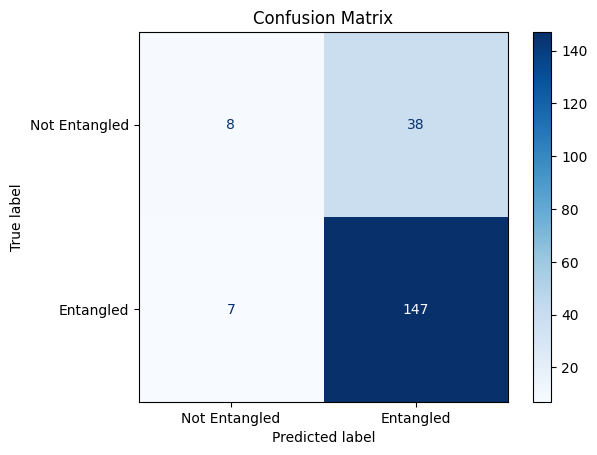

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Entangled', 'Entangled'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()